In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Carga de Datos

Hay 2 datos de calibracion. Uno corresponde a la potencia del laser en la salida del mismo y el otro a la salida del Beam Splitter el cual llega a las particulas por lo que es el considerado.

In [ ]:
data = pd.read_csv('Datos_Calibracion_Potencia_Laser_Beam_Splitter_500_mW.txt', delimiter = ';')

In [ ]:
data

,Time (ms),Power (W)
0,"0,000","4,0416E-08"
1,"64,828","4,0377E-08"
2,"119,828","4,0487E-08"
3,"181,514","4,0674E-08"
4,"239,514","4,0596E-08"
...,...,...
1055,"64019,570","2,8761E-09"
1056,"64079,252","2,6646E-09"
1057,"64139,252","2,5862E-09"
1058,"64198,930","2,6101E-09"


##Funciones Utiles

In [ ]:
def corregir_valores(data):
  #Los valores obtenidos del tracker tienen notacion cientifica con E pero python la interpreta con e. La funcion cambia E por e
  for column in data.columns:
    data[column] = data[column].astype(str).str.replace(',', '.', regex=False)
    data[column] = pd.to_numeric(data[column], errors='coerce')

##Limpieza y Transfomacion

<p align="justify"> Debido a que los datos del Tracker estan dados en notacion cientifica pero utilizando E, fue necesario aplicar una funcion para transformarlas en e ya que es la manera en que python interpreta esta notacion. Por otra parte, las columnas estan numerados de manera que la primer particula no posee indice numerico pero las $N - 1$ restantes si, del estilo $variable.i$. Por lo tanto, se utilizo el numero $0$ para enumerar a las variables sin numeracion. Por ultimo, para la realizacion del grafico de trayectorias fue necesario normalizarlas de manera que todas comiencen en cero. Las mismas se encuentran en las columnas _norm. Se define la variable global numero de moleculas como n_moleculas.

In [ ]:
data.columns

Index(['Time (ms)', 'Power (W)'], dtype='object')

In [ ]:
corregir_valores(data)

data.tail()

,Time (ms),Power (W)
1055,64019.570,2.876100e-09
1056,64079.252,2.664600e-09
1057,64139.252,2.586200e-09
1058,64198.930,2.610100e-09
1059,64258.930,2.735400e-09


In [ ]:
data.columns = ['t', 'W']

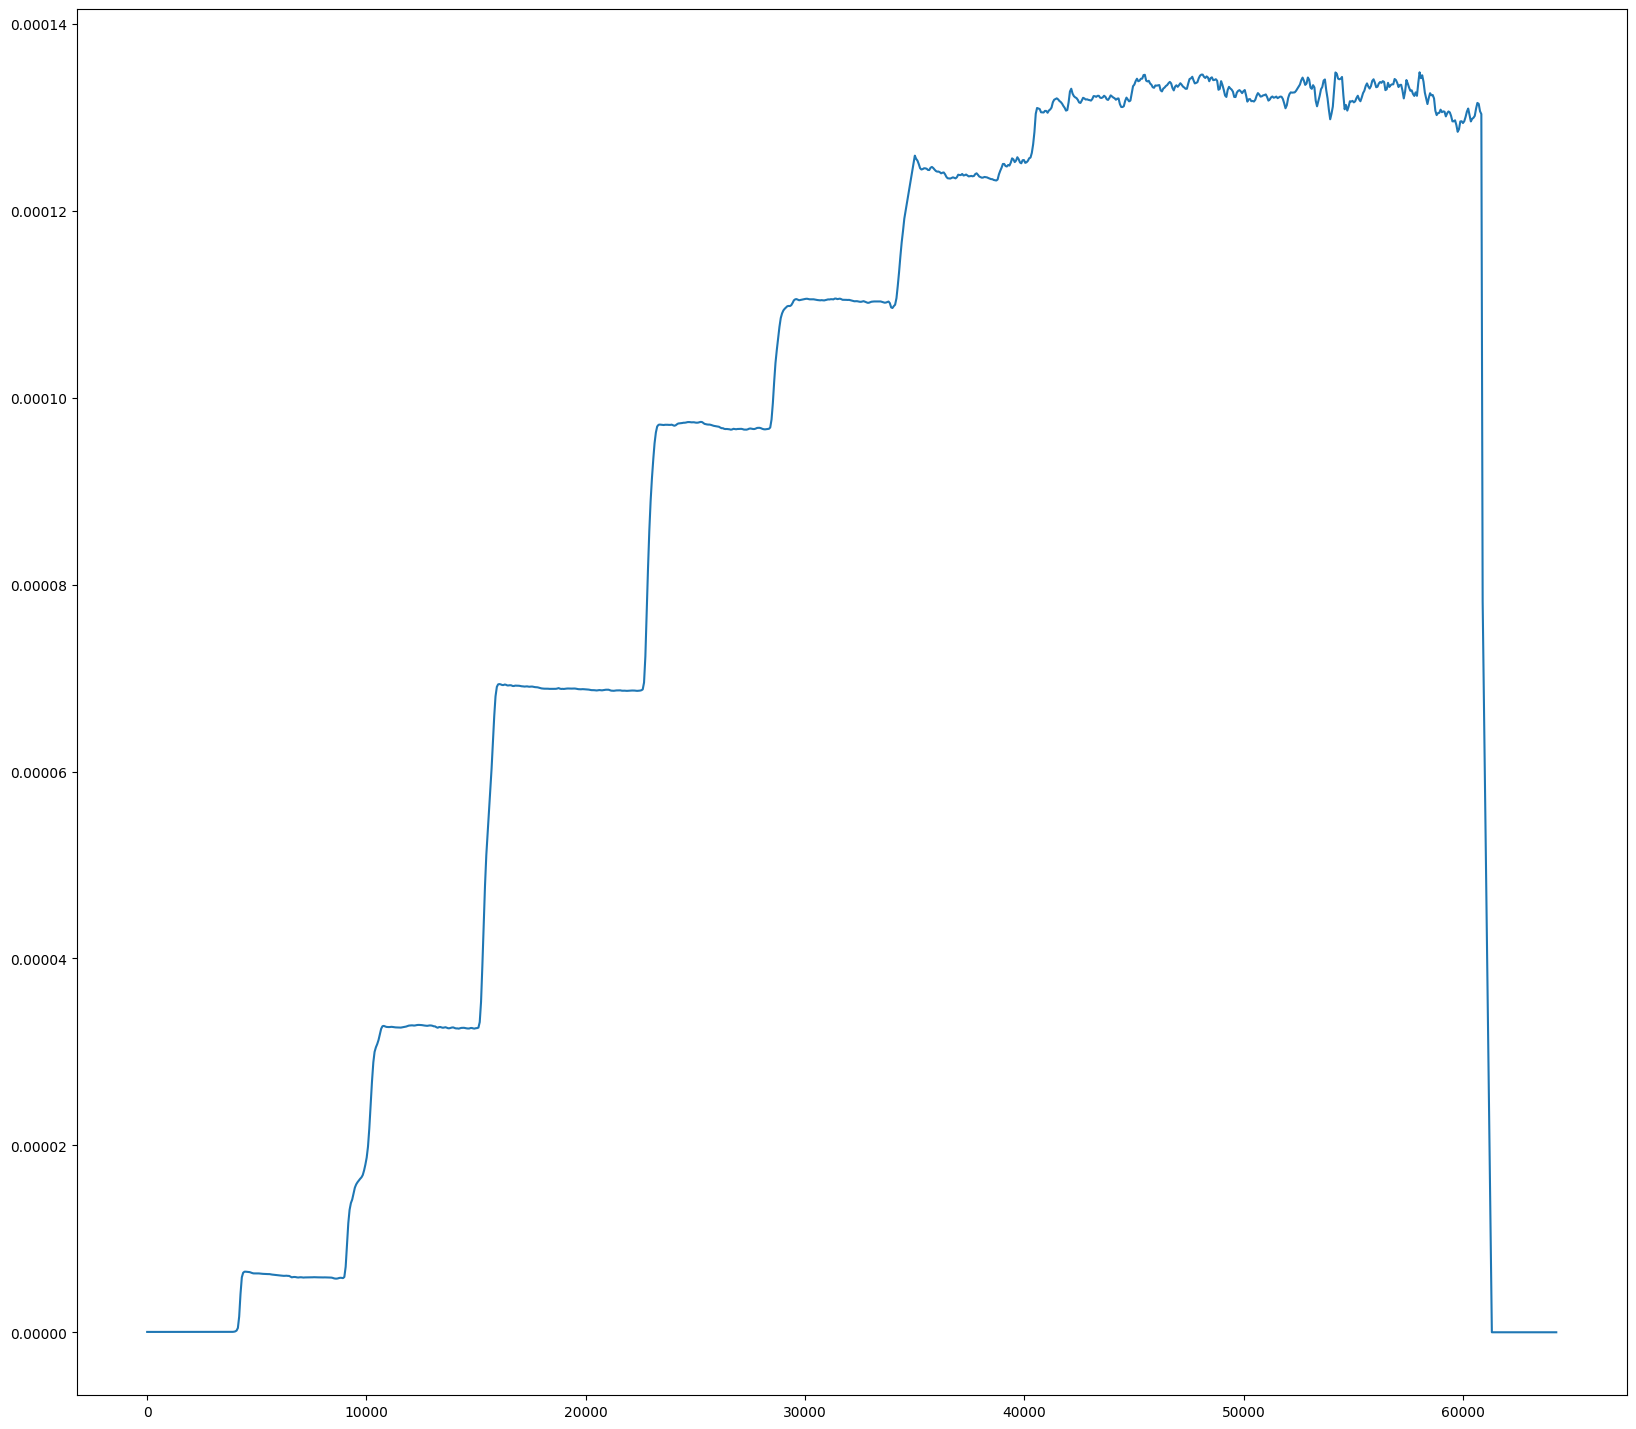

In [ ]:
#Los valores de escalon constante corresponden a las potencias utilizadas en el informe
plt.plot(data['t'], data['W'])

In [ ]:
#Calculo la derivada de la potencia para utilizar el find_peaks y hallar la potencia de los escalones

data['dW'] = data['W'].diff()

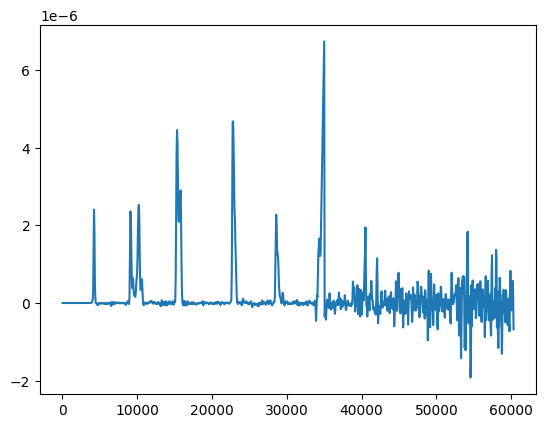

In [ ]:
plt.plot(data['t'][:1000], data['dW'][:1000])


In [ ]:
from scipy.signal import find_peaks

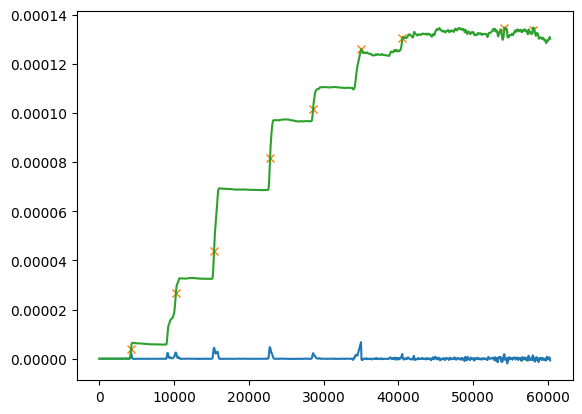

In [ ]:
picos, _ = find_peaks(data['dW'][:1000], height=1e-6, distance =50)

plt.plot(data['t'][:1000], data['dW'][:1000])
plt.plot(data['t'][picos], data['W'][picos], 'x')
plt.plot(data['t'][:1000], data['W'][:1000])

In [ ]:
picos

array([ 71, 171, 256, 381, 477, 577, 669, 897, 960])

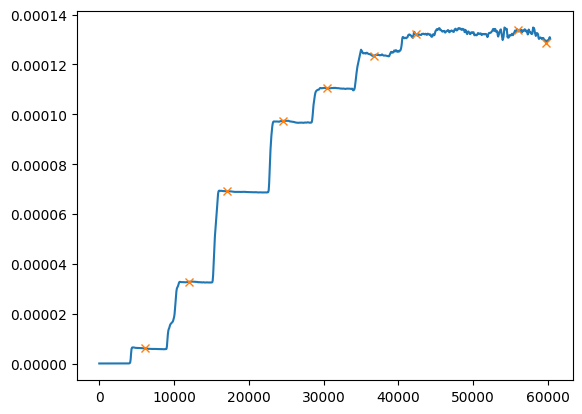

In [ ]:
#Utilizo el epsilon para ajustar los picos a los valores de escalon

epsilon = 30

plt.plot(data['t'][:1000], data['W'][:1000])
plt.plot(data['t'][picos+ epsilon], data['W'][picos+ epsilon], 'x')

In [ ]:
#Elimino los ultimos 2 valores que no corresponden a un escalon

picos_2 = picos + epsilon

picos_2 = picos_2[:7]

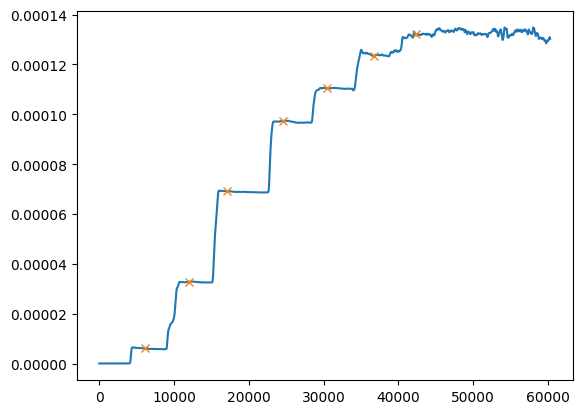

In [ ]:
plt.plot(data['t'][:1000], data['W'][:1000])
plt.plot(data['t'][picos_2], data['W'][picos_2], 'x')

#Array de datos calibrados

In [ ]:
pots = (data['W'][picos_2]*1e5).to_list()

In [ ]:
pots

[0.60707, 3.2839, 6.9107, 9.7379, 11.052000000000001, 12.352, 13.213]